**DATA UNDERSTANDING**

Data departemen produk yang digunakan adalah data inventory_item dan distribution_centers. Data inventory_item menjelaskan mengenai data persediaan produk dari perusahaan selama kurun waktu 5 tahun yaitu 2018-2022. Data distribution_centers merupakan data pendukung untuk menemukan insight lebih pada data utama yang digunakan.

In [71]:
#libraries
from pprint import pprint
from time import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

**1. Import data, Data Loading, Exploration**

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#data loading
start = time()
df_i = pd.read_csv("drive/MyDrive/dataset/inventory_items.csv")
df_d = pd.read_csv("drive/MyDrive/dataset/distribution_centers.csv")
end = time()

print("Done loading all datasets in {:.3f}s".format(end-start))

Done loading all datasets in 1.656s


In [74]:
print("num of inventory_items:", df_i.shape[0])
print("num of distribution_centers:", df_d.shape[0])

num of inventory_items: 487394
num of distribution_centers: 10



> **Insight**

Dari angka yang telah didapatkan, terdapat total kurang lebih 487 ribu produk persediaan pada 10 distribution center (gudang penyimpanan barang) yang ada



**2. Data Exploration**

**inventory_items (Primary Data)**

In [75]:
# Menampilkan 5 data teratas
df_i.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967,16898,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
1,90968,16898,2020-04-13 07:46:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
2,90969,16898,2020-09-02 17:43:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
3,90970,16898,2021-08-19 15:17:00+00:00,NaN,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3
4,96715,16898,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.0,Men,22811EE19846217512507785E74D12CC,3


In [76]:
# Menampilkan 5 data terbawah
df_i.tail() 

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
487389,234443,14392,2020-04-09 17:38:00+00:00,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
487390,290890,14392,2021-03-18 14:42:49+00:00,2021-05-15 04:49:49+00:00,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
487391,290891,14392,2022-04-25 03:04:00+00:00,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
487392,301361,14392,2021-05-15 11:44:11+00:00,2021-06-27 04:00:11+00:00,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
487393,301362,14392,2020-06-22 15:50:00+00:00,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9


In [77]:
# Mengetahui informasi mengenai data
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   cost                            487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
dtypes: float64(2), i

In [78]:
# Mengetahui jumlah missing values pada df_i
df_i.isna().sum()

id                                     0
product_id                             0
created_at                             0
sold_at                           306886
cost                                   0
product_category                       0
product_name                          35
product_brand                        374
product_retail_price                   0
product_department                     0
product_sku                            0
product_distribution_center_id         0
dtype: int64

In [79]:
# Mengetahui persentase missing value pada df_i
percent_missing = df_i.isnull().sum() * 100 / len(df_i)
missing_value_df = pd.DataFrame({'column_name': df_i.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
id,id,0.000000
product_id,product_id,0.000000
created_at,created_at,0.000000
sold_at,sold_at,62.964665
cost,cost,0.000000
product_category,product_category,0.000000
product_name,product_name,0.007181
product_brand,product_brand,0.076735
product_retail_price,product_retail_price,0.000000
product_department,product_department,0.000000


In [80]:
# Menampilkan statistik dari data inventory_items
df_i.describe()

,id,product_id,cost,product_retail_price,product_distribution_center_id
count,487394.000000,487394.000000,487394.000000,487394.000000,487394.000000
mean,243697.500000,15292.257424,28.746374,59.772834,4.992101
std,140698.672888,8408.118539,30.629290,65.871768,2.895917
min,1.000000,1.000000,0.008300,0.020000,1.000000
25%,121849.250000,8047.000000,11.394300,24.780001,2.000000
50%,243697.500000,16032.000000,19.944301,39.990002,5.000000
75%,365545.750000,22558.000000,34.698691,69.949997,8.000000
max,487394.000000,29120.000000,557.151002,999.000000,10.000000




> **Insight**

*   Pada data inventory_item terdapat 12 fitur yang memberikan informasi mengenai data inventory dari produk
*   Dari informasi tersebut juga didapati bahwa pada data inventory items terdapat fitur yang memiliki missing values yaitu sold_at, product_name, dan product_brand dengan persentase 62%, 0.0072%, dan 0.077%.



** distribution_centers (Secondary Data)**

In [81]:
# Menampilkan informasi data df_d
df_d

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


In [82]:
# Mengetahui informasi mengenai data
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [83]:
df_i.dtypes

id                                  int64
product_id                          int64
created_at                         object
sold_at                            object
cost                              float64
product_category                   object
product_name                       object
product_brand                      object
product_retail_price              float64
product_department                 object
product_sku                        object
product_distribution_center_id      int64
dtype: object

In [84]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   cost                            487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
dtypes: float64(2), i

In [85]:
# Melihat jumlah nilai unik masing-masing kolom di df_i
for feature in df_i.columns:
    print(
        f"- num of unique values in `{feature}`:",
        df_i[feature].nunique()
    )

- num of unique values in `id`: 487394
- num of unique values in `product_id`: 29050
- num of unique values in `created_at`: 444495
- num of unique values in `sold_at`: 180172
- num of unique values in `cost`: 26315
- num of unique values in `product_category`: 26
- num of unique values in `product_name`: 27247
- num of unique values in `product_brand`: 2754
- num of unique values in `product_retail_price`: 4187
- num of unique values in `product_department`: 2
- num of unique values in `product_sku`: 29050
- num of unique values in `product_distribution_center_id`: 10



> **Insight**

*   Pada distribution_centers data terdapat 4 fitur yang memberikan informasi mengenai lokasi distribution center
*   Tidak terdapat missing values pada data ini
*   Terdapat perbedaan antara jumlah nilai unik `created_at` dengan `sold_at` yang dapat mengindikasikan bahwa beberapa produk inventory tidak laku terjual
*   `product_department` menjadi fitur dengan jumlah nilai unik terkecil
*   Terdapat perbedaan antara pasangan `id` dengan `product id`. sehingga berdasarkan pembelajarn sebelumnya mungkin diperlukan melihat two-way table antar kedua fitur ini.

** Exploratory Data Analysis**

Pada EDA, data yang digunakan adalah data_join. dimana data ini merupakan data yang sudah dilakukan join (yaitu inner join) antara inventory_items dan distribution_centers sebelumnya menggunakan postgreSQL

In [86]:
df_all = pd.read_csv("/content/drive/MyDrive/dataset/data-join.csv")

In [87]:
df_all

,id,name,latitude,longitude,created_at,sold_at,product_category,cost,product_department,product_retail_price
0,3,Houston TX,29.7604,-95.3698,2021-07-19 02:20:10,2021-07-20,Tops & Tees,13.925000,Men,25.000000
1,3,Houston TX,29.7604,-95.3698,2020-04-13 07:46:00,NaN,Tops & Tees,13.925000,Men,25.000000
2,3,Houston TX,29.7604,-95.3698,2020-09-02 17:43:00,NaN,Tops & Tees,13.925000,Men,25.000000
3,3,Houston TX,29.7604,-95.3698,2021-08-19 15:17:00,NaN,Tops & Tees,13.925000,Men,25.000000
4,3,Houston TX,29.7604,-95.3698,2020-05-09 11:16:10,2020-06-23,Tops & Tees,13.925000,Men,25.000000
...,...,...,...,...,...,...,...,...,...,...
487389,9,Charleston SC,32.7833,-79.9333,2020-04-09 17:38:00,NaN,Maternity,15.752521,Women,35.720001
487390,9,Charleston SC,32.7833,-79.9333,2021-03-18 14:42:49,2021-05-15,Maternity,15.752521,Women,35.720001
487391,9,Charleston SC,32.7833,-79.9333,2022-04-25 03:04:00,NaN,Maternity,15.752521,Women,35.720001
487392,9,Charleston SC,32.7833,-79.9333,2021-05-15 11:44:11,2021-06-27,Maternity,15.752521,Women,35.720001


In [88]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    487394 non-null  int64  
 1   name                  487394 non-null  object 
 2   latitude              487394 non-null  float64
 3   longitude             487394 non-null  float64
 4   created_at            487394 non-null  object 
 5   sold_at               180508 non-null  object 
 6   product_category      487394 non-null  object 
 7   cost                  487394 non-null  float64
 8   product_department    487394 non-null  object 
 9   product_retail_price  487394 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 37.2+ MB


In [89]:
# Melihat missing value
df_all.isna().sum()

id                           0
name                         0
latitude                     0
longitude                    0
created_at                   0
sold_at                 306886
product_category             0
cost                         0
product_department           0
product_retail_price         0
dtype: int64

In [90]:
# Mengubah data type yang kurang sesuai
df_all['id'] = df_all['id'].astype(object)
df_all['created_at']=pd.to_datetime(df_all['created_at'])
df_all['sold_at']=pd.to_datetime(df_all['sold_at'])

In [91]:
df_all.dtypes

id                              object
name                            object
latitude                       float64
longitude                      float64
created_at              datetime64[ns]
sold_at                 datetime64[ns]
product_category                object
cost                           float64
product_department              object
product_retail_price           float64
dtype: object

In [92]:
# Mengetahui jumlah inventory product based on product_department
df_all['product_department']. value_counts()

Men      244421
Women    242973
Name: product_department, dtype: int64

In [93]:
# Menggunakan fungsi plot_count untuk visualisasi
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)

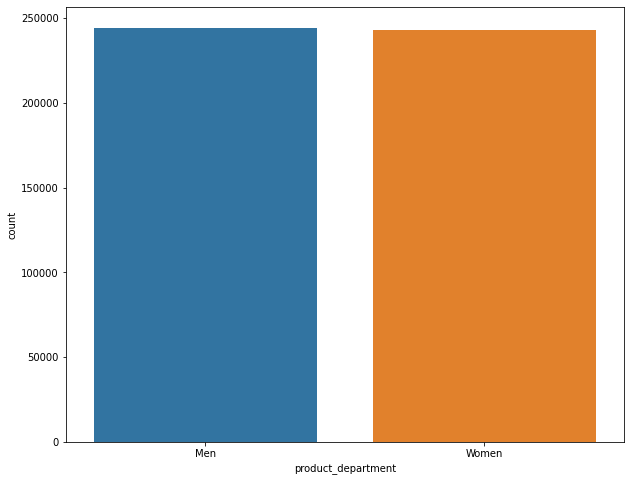

In [94]:
# Visualisasi product department
plot_count(x="product_department", data=df_all, figsize=(10, 8))

Selanjutnya mencari inventory product yang paling banyak tersedia

In [95]:
# Mengghtiung jumlah product_category
df_all['product_category']. value_counts()

Intimates                        36319
Jeans                            34319
Fashion Hoodies & Sweatshirts    31926
Tops & Tees                      31842
Swim                             30228
Sleep & Lounge                   30036
Sweaters                         29948
Shorts                           29838
Accessories                      26390
Active                           24617
Outerwear & Coats                24303
Underwear                        20602
Pants                            19132
Socks                            16542
Dresses                          14570
Suits & Sport Coats              13923
Maternity                        13590
Plus                             11413
Socks & Hosiery                  10273
Pants & Capris                    9165
Leggings                          8620
Blazers & Jackets                 8410
Skirts                            5572
Suits                             2801
Jumpsuits & Rompers               2404
Clothing Sets            

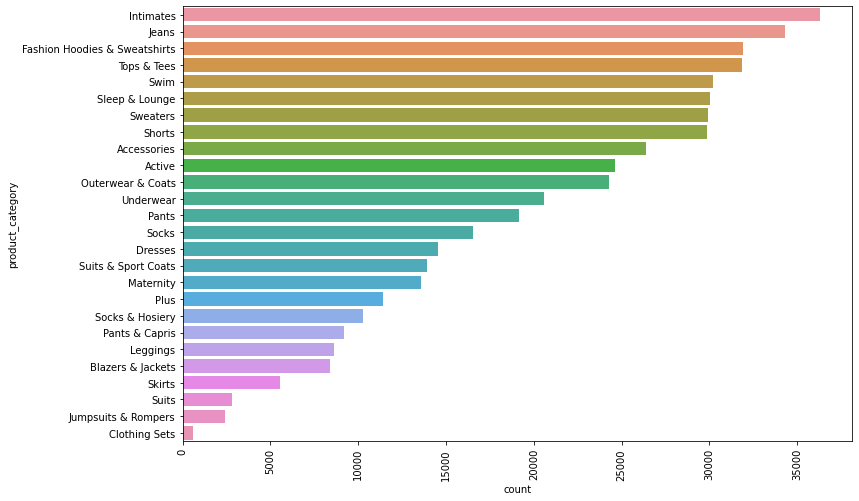

In [96]:
# Visualisasi product_category
plot_count(y="product_category", data=df_all, figsize=(12, 8))
plt.xticks(rotation=90)
plt.show()

In [97]:
# Menghitung count value name
df_all['name'].value_counts()

Memphis TN                                     65104
Chicago IL                                     64185
Houston TX                                     61463
Mobile AL                                      49473
Los Angeles CA                                 46996
Philadelphia PA                                44971
Port Authority of New York/New Jersey NY/NJ    44238
Charleston SC                                  44076
New Orleans LA                                 34860
Savannah GA                                    32028
Name: name, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


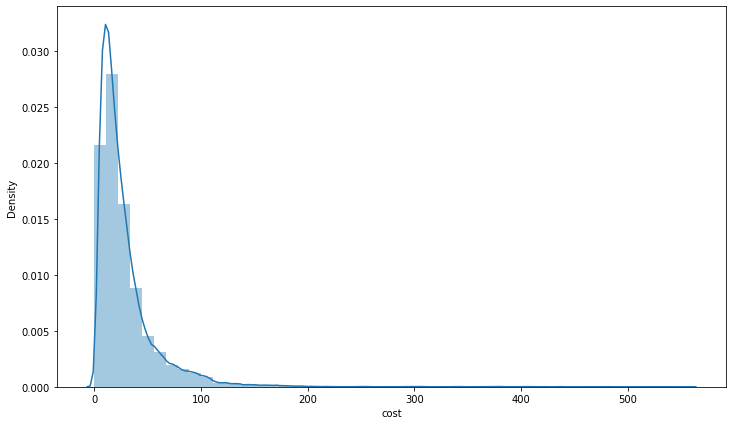

In [98]:
# Mengetahui distribusi cost
plt.figure(figsize = [12,7])
sns.distplot(df_all['cost'], hist=True)
plt.show()

`cost` berindikasi outlier, sehingga diperlukan untuk mendeteksi outlier tersebut

In [99]:
# deteksi outlier pada cost
mean = df_all['cost'].mean()
std = df_all['cost'].std()

In [100]:
limit_cost = 3*std

In [101]:
upper_limit_cost = mean + 3*std
lower_limit_cost = mean - 3*std

In [102]:
# mencari tahu banyak data outlier pada cost
(df_all['cost'] > upper_limit_cost).sum()

7736

In [103]:
# Treat outlier cost
def outliers(df, feature):
    Q1= df_all[feature].quantile(0.25)
    Q3 = df_all[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df_all, "cost")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  69.65527802559399
Lower Whisker:  -23.562287074139494


In [104]:
#transformasikan data outlier menjadi modus
mean_cost = df_all.loc[df_all['cost']> 69.65527802559399, 'cost'].mean()
df_all.loc[df_all.cost > 69.65527802559399, 'cost'] = np.nan
df_all.fillna(mean_cost,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


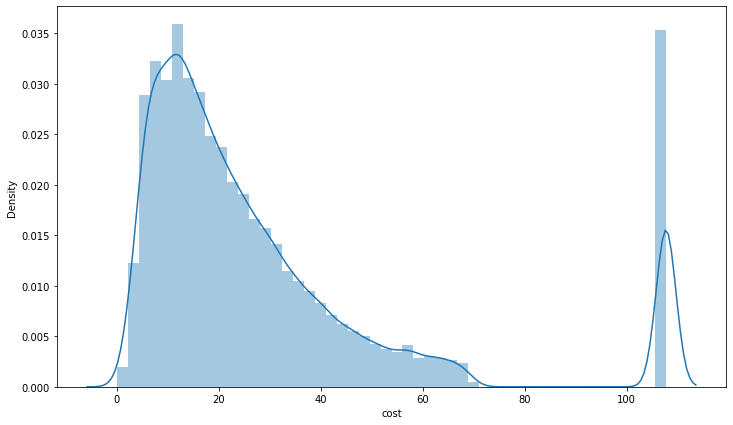

In [105]:
plt.figure(figsize = [12,7])
sns.distplot(df_all['cost'], hist=True)
plt.show()

In [106]:
(df_all['cost'] > upper_limit_cost).sum()

0

tidak ada data outlier lagi di fitur `cost`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


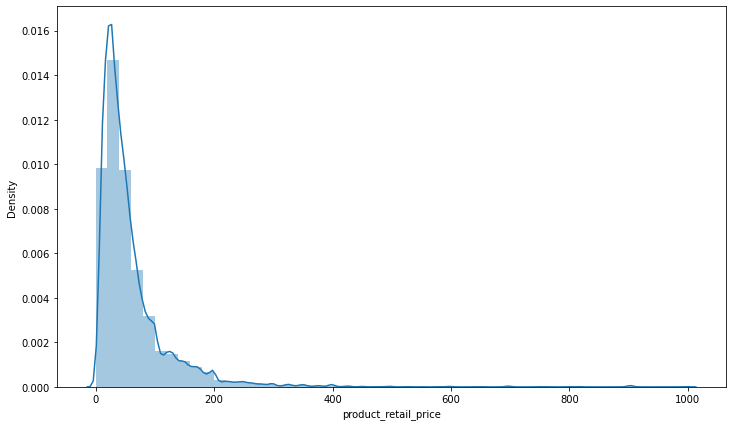

In [107]:
# Mengetahui distribusi nilai product_retail_price
plt.figure(figsize = [12,7])
sns.distplot(df_all['product_retail_price'], hist=True)
plt.show()

`product_retail_price` berindikasi outlier, sehingga diperlukan untuk mendeteksi outlier tersebut

In [108]:
# deteksi outlier pada product_retail_price
mean = df_all['product_retail_price'].mean()
std = df_all['product_retail_price'].std()

In [109]:
limit_prp = 3*std

In [110]:
upper_limit_prp = mean + 3*std
lower_limit_prp = mean - 3*std

In [111]:
# mencari tahu banyak data outlier pada cost
(df_all['product_retail_price'] > upper_limit_prp).sum()

8259

In [112]:
# Treat outlier prp
def outliers(df, feature):
    Q1= df_all[feature].quantile(0.25)
    Q3 = df_all[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df_all, "product_retail_price")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  137.7049913406372
Lower Whisker:  -42.97499370574951


In [113]:
mean_prp = df_all.loc[df_all['product_retail_price']>  137.7049913406372, 'product_retail_price'].mean()
df_all.loc[df_all.product_retail_price >  137.7049913406372, 'product_retail_price'] = np.nan
df_all.fillna(mean_prp,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


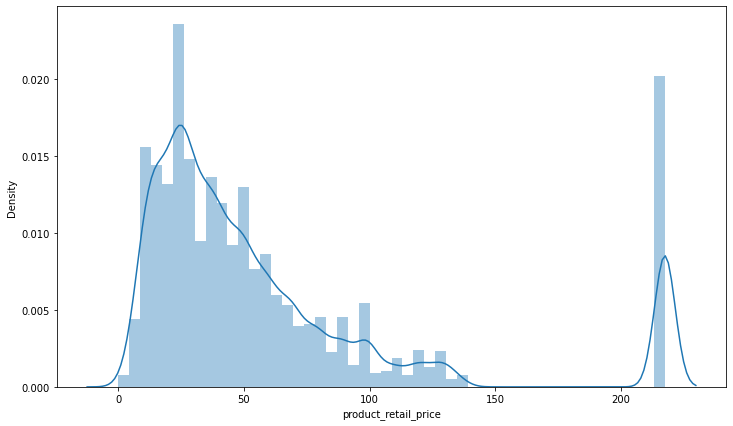

In [114]:
# Mengetahui distribusi nilai product_retail_price
plt.figure(figsize = [12,7])
sns.distplot(df_all['product_retail_price'], hist=True)
plt.show()

In [115]:
(df_all['product_retail_price'] > upper_limit_prp).sum()

0

tidak ada data outlier lagi di fitur `product_retail_price`

In [116]:
# Menghitung korelasi
dfkor=df_all.corr()
dfkor

,id,latitude,longitude,cost,product_retail_price
id,1.000000,-0.235644,0.426737,0.015709,0.003349
latitude,-0.235644,1.000000,0.361261,-0.022353,-0.020386
longitude,0.426737,0.361261,1.000000,0.008675,0.006000
cost,0.015709,-0.022353,0.008675,1.000000,0.961738
product_retail_price,0.003349,-0.020386,0.006000,0.961738,1.000000


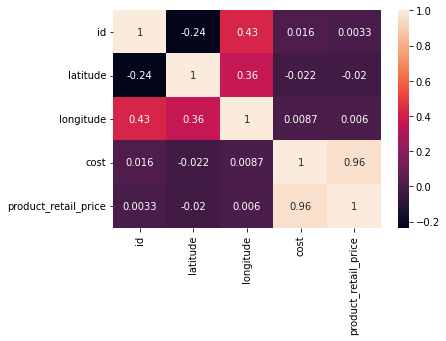

In [117]:
sns.heatmap(dfkor, annot=True)


> **Insight**

*   Produk yang ditujukan untuk Men/laki-laki lebih banyak tersedia sebagai inventory product
*   Produk Intimates menjadi `product category` paling banyak tersedia sebagai inventory product
*   Terdapat Outlier pada fitur `cost` dan `product_retail_price` yaitu sebanyak 7736 untuk `cost` dan 8259 untuk `product_retail_price`
*   Memphis TN menjadi distribution center paling banyak inventory product
*   Tidak ada outlier lagi pada data `cost` dan `product_retail_price`

In [118]:
# Membuat column baru untuk melihat produk yang terjual dan tidak
df_all['product_status']= df_all['sold_at']

# Mengubah date type product_status menjadi year
df_all['product_status']=pd.to_datetime(df_all['product_status'],errors='coerce').dt.strftime('%Y')

In [119]:
df_all['product_status']

0         2021
1          NaN
2          NaN
3          NaN
4         2020
          ... 
487389     NaN
487390    2021
487391     NaN
487392    2021
487393     NaN
Name: product_status, Length: 487394, dtype: object

In [120]:
# Mengubah nilai NAN menjadi 0 (Tidak Terjual)
df_all[["product_status"]] = df_all[["product_status"]].fillna('0')

In [121]:
for feature in df_all.columns:
    if (
        feature.endswith("product_status")
    ):
        df_all[feature] = df_all[feature].astype("int")
df_all.dtypes

id                               int64
name                            object
latitude                       float64
longitude                      float64
created_at              datetime64[ns]
sold_at                         object
product_category                object
cost                           float64
product_department              object
product_retail_price           float64
product_status                   int64
dtype: object

In [122]:
# Mengubah nilai 2018,2019,2020,2021,2022 menjadi 1
df_all.loc[df_all['product_status']>2017,'product_status']=1
df_all

,id,name,latitude,longitude,created_at,sold_at,product_category,cost,product_department,product_retail_price,product_status
0,3,Houston TX,29.7604,-95.3698,2021-07-19 02:20:10,2021-07-20 00:00:00,Tops & Tees,13.925000,Men,25.000000,1
1,3,Houston TX,29.7604,-95.3698,2020-04-13 07:46:00,107.723885,Tops & Tees,13.925000,Men,25.000000,0
2,3,Houston TX,29.7604,-95.3698,2020-09-02 17:43:00,107.723885,Tops & Tees,13.925000,Men,25.000000,0
3,3,Houston TX,29.7604,-95.3698,2021-08-19 15:17:00,107.723885,Tops & Tees,13.925000,Men,25.000000,0
4,3,Houston TX,29.7604,-95.3698,2020-05-09 11:16:10,2020-06-23 00:00:00,Tops & Tees,13.925000,Men,25.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
487389,9,Charleston SC,32.7833,-79.9333,2020-04-09 17:38:00,107.723885,Maternity,15.752521,Women,35.720001,0
487390,9,Charleston SC,32.7833,-79.9333,2021-03-18 14:42:49,2021-05-15 00:00:00,Maternity,15.752521,Women,35.720001,1
487391,9,Charleston SC,32.7833,-79.9333,2022-04-25 03:04:00,107.723885,Maternity,15.752521,Women,35.720001,0
487392,9,Charleston SC,32.7833,-79.9333,2021-05-15 11:44:11,2021-06-27 00:00:00,Maternity,15.752521,Women,35.720001,1


No handles with labels found to put in legend.


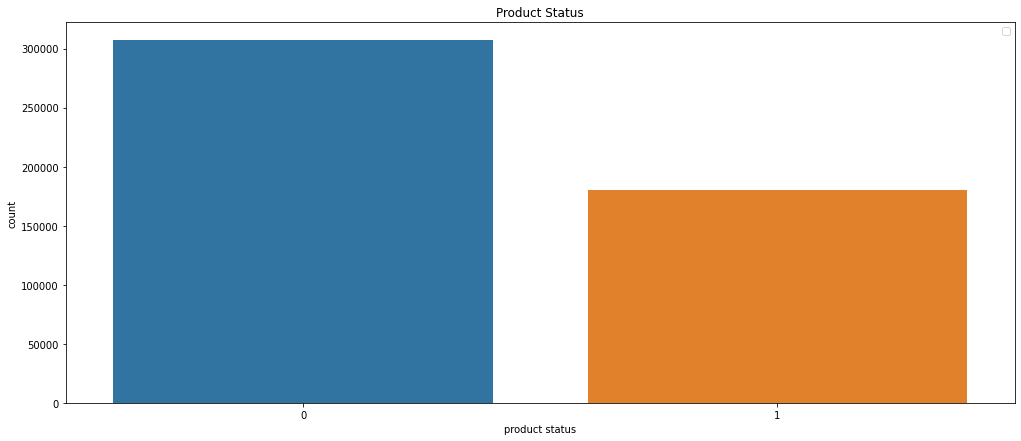

In [123]:
# visualisasi perbandingan terjual dan tidak terjual
plt.figure(figsize=(17,7))
sns.countplot(x='product_status', data=df_all)
plt.title('Product Status')
plt.xlabel('product status')
plt.legend();

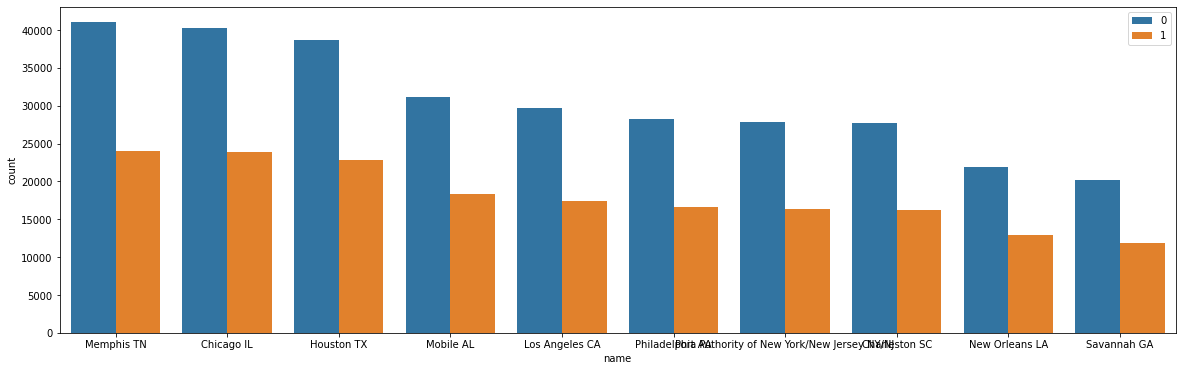

In [124]:
# Mengetahui perbandingan product tidak terjual untuk semua distribution centers
plot_count(x="name", hue="product_status",data=df_all, figsize=(20, 6), )
plt.legend(loc="upper right")
plt.show()

In [125]:
df_all.to_csv('data_departemen_produk.csv')

In [126]:
#

**DATA PREPARATION DAN MODEL DEPLOYMENT**

In [127]:
df_all.drop(columns=["sold_at", "created_at", "id", "product_category", "latitude", "longitude"], inplace=True)

In [128]:
df_all

,name,cost,product_department,product_retail_price,product_status
0,Houston TX,13.925000,Men,25.000000,1
1,Houston TX,13.925000,Men,25.000000,0
2,Houston TX,13.925000,Men,25.000000,0
3,Houston TX,13.925000,Men,25.000000,0
4,Houston TX,13.925000,Men,25.000000,1
...,...,...,...,...,...
487389,Charleston SC,15.752521,Women,35.720001,0
487390,Charleston SC,15.752521,Women,35.720001,1
487391,Charleston SC,15.752521,Women,35.720001,0
487392,Charleston SC,15.752521,Women,35.720001,1


In [129]:
encoder = OneHotEncoder()
encoder.fit(df_all.select_dtypes(include="object"))
df_all_onehot = pd.DataFrame(encoder.transform(df_all.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())

df_all_preprocessed = pd.concat([df_all.select_dtypes(exclude="object"), df_all_onehot],axis=1)

scaler = StandardScaler()
scaler.fit(df_all_preprocessed)
df_all_scaled = pd.DataFrame(scaler.transform(df_all_preprocessed),columns=df_all_preprocessed.columns)

df_all_scaled.head()

,cost,product_retail_price,product_status,name_Charleston SC,name_Chicago IL,name_Houston TX,name_Los Angeles CA,name_Memphis TN,name_Mobile AL,name_New Orleans LA,name_Philadelphia PA,name_Port Authority of New York/New Jersey NY/NJ,name_Savannah GA,product_department_Men,product_department_Women
0,-0.552594,-0.616167,1.303888,-0.315314,-0.389439,2.632466,-0.326669,-0.392644,-0.336114,-0.277548,-0.318821,-0.315951,-0.265207,0.997033,-0.997033
1,-0.552594,-0.616167,-0.766937,-0.315314,-0.389439,2.632466,-0.326669,-0.392644,-0.336114,-0.277548,-0.318821,-0.315951,-0.265207,0.997033,-0.997033
2,-0.552594,-0.616167,-0.766937,-0.315314,-0.389439,2.632466,-0.326669,-0.392644,-0.336114,-0.277548,-0.318821,-0.315951,-0.265207,0.997033,-0.997033
3,-0.552594,-0.616167,-0.766937,-0.315314,-0.389439,2.632466,-0.326669,-0.392644,-0.336114,-0.277548,-0.318821,-0.315951,-0.265207,0.997033,-0.997033
4,-0.552594,-0.616167,1.303888,-0.315314,-0.389439,2.632466,-0.326669,-0.392644,-0.336114,-0.277548,-0.318821,-0.315951,-0.265207,0.997033,-0.997033


In [130]:
df_all_scaled.isna().sum()

cost                                                0
product_retail_price                                0
product_status                                      0
name_Charleston SC                                  0
name_Chicago IL                                     0
name_Houston TX                                     0
name_Los Angeles CA                                 0
name_Memphis TN                                     0
name_Mobile AL                                      0
name_New Orleans LA                                 0
name_Philadelphia PA                                0
name_Port Authority of New York/New Jersey NY/NJ    0
name_Savannah GA                                    0
product_department_Men                              0
product_department_Women                            0
dtype: int64

**K-Means**

In [131]:
K = 3
kmeans_3 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_3.fit(df_all_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 4.172s


In [132]:
K = 10
mb_kmeans_10 = MiniBatchKMeans(n_clusters=K)

start = time()
mb_kmeans_10.fit(df_all_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.714s


In [133]:
X = df_all.assign(
    clusters_of_3=kmeans_3.predict(df_all_scaled),
    clusters_of_10_mb=mb_kmeans_10.predict(df_all_scaled),
)

with pd.option_context("display.max_columns", None):
    display(X.head())

,name,cost,product_department,product_retail_price,product_status,clusters_of_3,clusters_of_10_mb
0,Houston TX,13.925,Men,25.0,1,1,6
1,Houston TX,13.925,Men,25.0,0,1,6
2,Houston TX,13.925,Men,25.0,0,1,6
3,Houston TX,13.925,Men,25.0,0,1,6
4,Houston TX,13.925,Men,25.0,1,1,6


In [134]:
X

,name,cost,product_department,product_retail_price,product_status,clusters_of_3,clusters_of_10_mb
0,Houston TX,13.925000,Men,25.000000,1,1,6
1,Houston TX,13.925000,Men,25.000000,0,1,6
2,Houston TX,13.925000,Men,25.000000,0,1,6
3,Houston TX,13.925000,Men,25.000000,0,1,6
4,Houston TX,13.925000,Men,25.000000,1,1,6
...,...,...,...,...,...,...,...
487389,Charleston SC,15.752521,Women,35.720001,0,0,7
487390,Charleston SC,15.752521,Women,35.720001,1,0,7
487391,Charleston SC,15.752521,Women,35.720001,0,0,7
487392,Charleston SC,15.752521,Women,35.720001,1,0,7


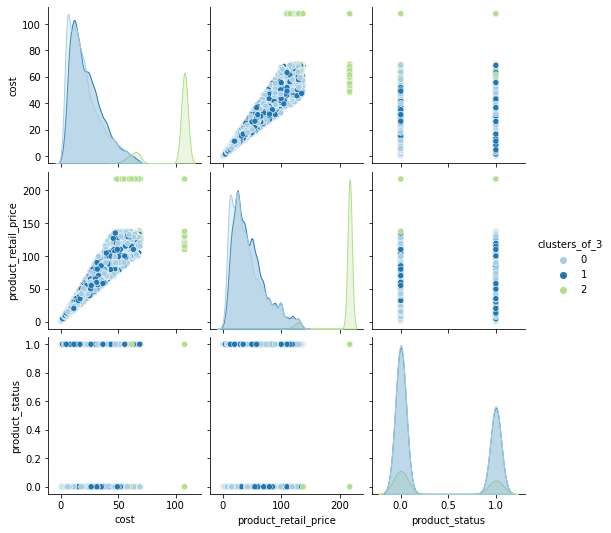

In [135]:
result = X.sample(frac=.2, random_state=11).drop(columns=["clusters_of_10_mb"])
sns.pairplot(result, hue="clusters_of_3", palette="Paired")
plt.show()

Clustering model jika hanya memperhitungkan 2 fitur yaitu cost dan product retail price

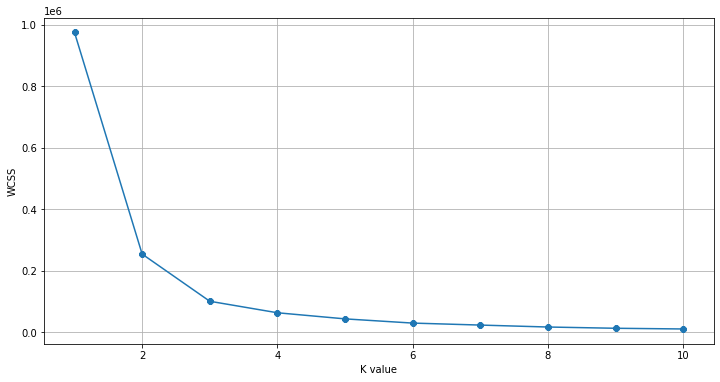

In [136]:
x1 =df_all_scaled.loc[:,['cost','product_retail_price']].values

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,marker='8')
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

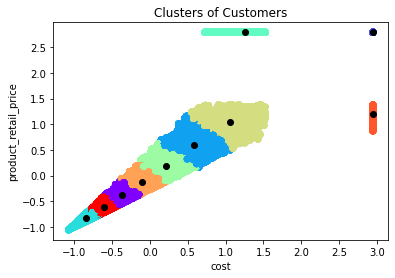

In [137]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('cost')
plt.ylabel('product_retail_price')
plt.show()


> Insight

*   Jika menggunakan 3 fitur yaitu cost, product retail price, dan product status, terlihat bahwa kluster 1 dan kluster 2 memiliki karakteristik yang hampir sama, hanya saja jumlah product yang terjual lebih didominasi sedikit oleh cluster 1. sedangkan cluster 2 memiliki karakteristik produk yang tersedia merupakan produk mewah dengan cost yang tinggi dan harga jual yang mahal pula.
*  Jika menggunakan 2 fitur saja yakni cost dan product retail price terlihat bahwa antara cost dan product retail price memiliki korelasi positif. Terdapat 10 klaster yang dihasilkan dimana 8 dari klaster tersebut memiliki karakteristik apabila cost produk meningkat harga jual juga meningkat, sedangkan cluster lainnya memiliki karakteristik yang sedikit berbeda dimana satu klaster memiliki produk yang apabila cost meningkat harga jual produk tetap berada di angka yang sama, sedangkan klaster yang lainnya memiliki karakteristik yang berkebalikan yaitu cost produk tetap tapi memungkinkan harga jual produk malah meningkat.






**Model Evaluation**

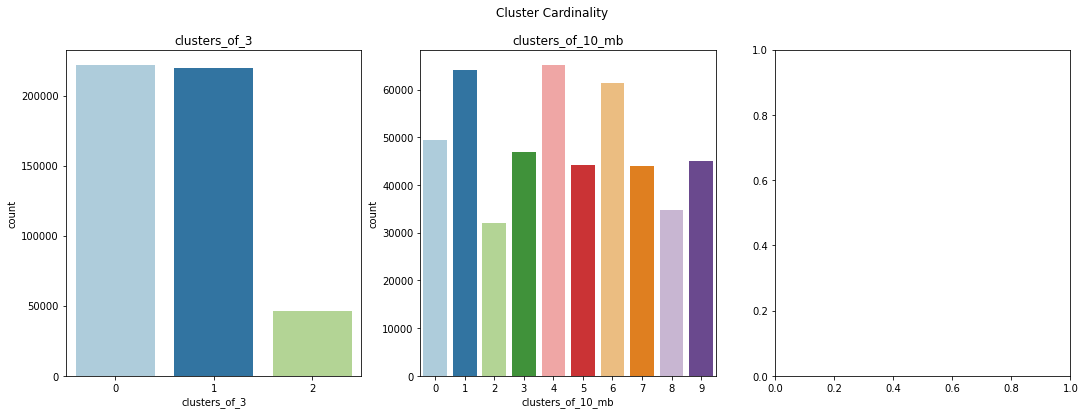

In [138]:
#Cluster Cardinality
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_3",  "clusters_of_10_mb"]):
    sns.countplot(x=preds, data=X, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

Dari visualisasi cluster cardinality di atas:

*   Model dengan 3 cluster (k=5), terlihat bahwa terdapat perbedaan cukup jauh antara cluster 0 dengan cluster 1, dan 2
*   Moswl dengan 10 cluster (k=10), terlihat kardinalitas cluster 1,2,6 cukup jauh jika dibandingkan dengan cluster lain

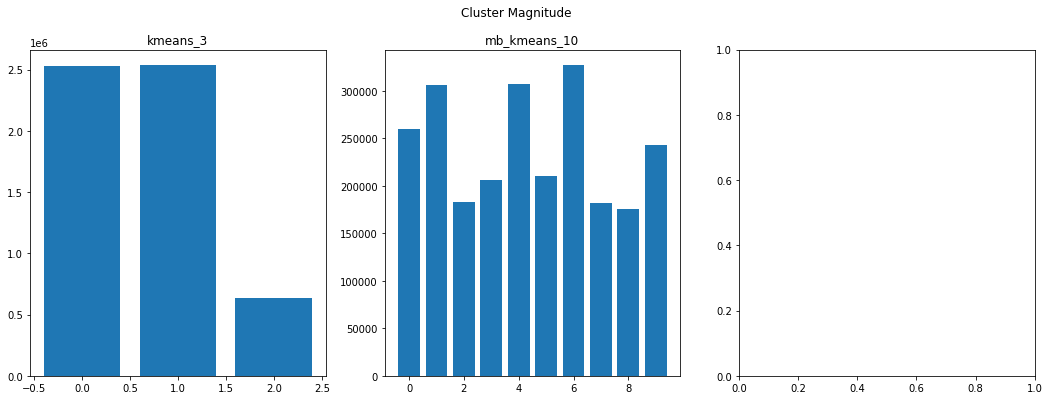

In [139]:
#Cluster Magnitude
fig, axis = plt.subplots(1, 3, figsize=(18, 6))
for ax, model, name in zip(axis,[kmeans_3,  mb_kmeans_10],["kmeans_3", "mb_kmeans_10"]):
    distances = model.transform(df_all_scaled)
    preds = model.predict(df_all_scaled)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

In [140]:
# elbow method
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 20):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(df_all_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 1.113s
Clustering with n_clusters=2
Done clustering in 3.090s
Clustering with n_clusters=3
Done clustering in 4.151s
Clustering with n_clusters=4
Done clustering in 4.901s
Clustering with n_clusters=5
Done clustering in 5.046s
Clustering with n_clusters=6
Done clustering in 7.274s
Clustering with n_clusters=7
Done clustering in 8.611s
Clustering with n_clusters=8
Done clustering in 5.629s
Clustering with n_clusters=9
Done clustering in 5.785s
Clustering with n_clusters=10
Done clustering in 6.303s
Clustering with n_clusters=11
Done clustering in 6.886s
Clustering with n_clusters=12
Done clustering in 7.055s
Clustering with n_clusters=13
Done clustering in 7.634s
Clustering with n_clusters=14
Done clustering in 8.092s
Clustering with n_clusters=15
Done clustering in 10.065s
Clustering with n_clusters=16
Done clustering in 14.353s
Clustering with n_clusters=17
Done clustering in 12.358s
Clustering with n_clusters=18
Done clustering in 17.51

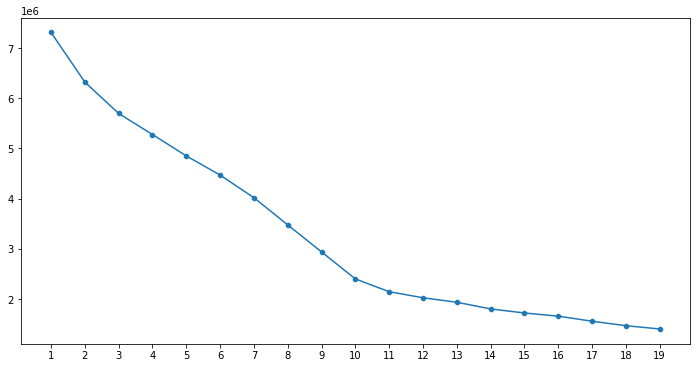

In [141]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 20), y=ssd)
sns.scatterplot(x=range(1, 20), y=ssd)
plt.xticks(range(1, 20))
plt.show()